# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import json
import requests
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
# Twitter Api params
Consumer_key = ""
Consumer_secret = ""
Access_token = ""
Access_secret = ""
bearer_token = ""

In [3]:
# Declare usefull variables 
twitter_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
df_rate = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
r = requests.get(twitter_url)
response = requests.get(twitter_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [7]:
df_image = pd.read_csv('image_predictions.tsv' , sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Twiter API Auth
auth = tweepy.OAuthHandler(Consumer_key, Consumer_secret)
auth.set_access_token(Access_token, Access_secret)
api = tweepy.API(auth)

In [9]:
#def get_api_details(tweet_id):
#    with open('tweet_json.txt', 'w') as f:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, f)
#           f.write('\n')
#        except Exception as e:
#            pass

In [10]:
# Load all tweet details
#df_rate.tweet_id.apply(lambda x:get_api_details(x))

In [11]:
# Instead of download file from twitter, we will simply download it directly from udacity
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
r = requests.get(url)
response = requests.get(url)
with open('tweet_json.txt', 'wb') as f:
    f.write(response.content)

In [12]:
df_tweet_details = pd.read_json('tweet-json.txt',lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### I - Let's start our quality check from the <b>twitter_archive_enhanced.csv</b> dataset 

In [13]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### we start checking datatypes

In [14]:
#in_reply_to_status_id, in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id,  must be string not float
# timestamp and retweeted_status_timestamp are in object type but must be datetime

In [15]:
#### checking numeric data values now

In [16]:
df_rate.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
#df_rate['rating_denominator'].value_counts()
pd.set_option('display.max_colwidth', 5555)
df_rate[df_rate['rating_denominator']!=10][['tweet_id','text' ,'rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [18]:
#After the describe, We can see that there is a rating_denominator equals to 0 which seems not correct

In [19]:
df_rate[df_rate['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### Other data types values 

In [20]:
# Source
df_rate.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
# Name
df_rate.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
# Some dogs name are a and None. a is surely an error but None indicates clearly the dog has no known name
df_rate[df_rate['name']=='a'].text.value_counts()

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF    1
This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                                         1
This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX                     1
This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM                    1
This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl                     1
This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5                   1
This is a wild Toblerone from Papu

'None' is not a correct value. It sould be NaN. </br>
'a' is surely an error while retrieving the real name of the dog.

In [23]:
df_rate.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df_rate.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
df_rate.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [26]:
df_rate.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

The None values on doggo, floofer, pupper and puppo  are incorrect. It sould be <b>NaN</b> or we can make these column boolean.

### II -  <b>tweet_json.txt</b> dataset 

In [27]:
df_image.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
#2356 vs 2075

### III -  <b>image_predictions.tsv</b> dataset 

In [31]:
df_tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

- Columns id_str,in_reply_to_status_id , in_reply_to_user_id , quoted_status_id should be integer instead of float. </br>
- Columns in_reply_to_status_id_str , in_reply_to_user_id_str, quoted_status_id_str should be string instead of float

In [32]:
#df_tweet_details.query('retweet_count > 0 & retweeted == True')
#df_tweet_details.query('favorite_count > 0 & favorited == False')

### Quality issues
1. Some dog names are <b>'a'</b> or <b>'None'</b>. If we have not the real name of the dog, it should be NaN. </br>

2. in_reply_to_status_id, in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id,  must be string not float. </br>

3. timestamp and retweeted_status_timestamp are in object type but must be datetime. </br>

4. rating_denominator has some incorrect values such as <b>0</b></br>

5. <b>source</b> is a link instead of being a simple Text. </br>

6. <b>doggo</b>, <b>floofer</b>, <b>pupper</b>, <b>puppo</b> could have been encoded as Boolean or None values could have been set to NaN. </br>

7. Some tweets have more than 0 favorite_count but have the favorited column marked as False. Same note on retweet_count and  retweeted. </br>

8. Retweets must be removed


### Tidiness issues
1. Columns doggo, floofer, pupper, puppo  in  twitter_archive_enhanced.csv can be combined in one columns.

2. All the 3 datasets must be combined

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Creating a copy of all dataset
df_details_cp =  df_tweet_details.copy()
df_image_cp = df_image.copy()
df_rate_cp = df_rate.copy()

In [34]:
df_tweet_details = df_details_cp
df_tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [35]:
# We want to remove some useless columns from df_tweet_details first 
columns_to_rm = ['truncated' ,'display_text_range' , 'entities' ,
                 'extended_entities' , 'user' , 'geo' , 'coordinates' , 'place' , 'text',
                 'contributors' , 'is_quote_status' , 'possibly_sensitive' , 
                 'possibly_sensitive_appealable' , 'lang' , 'in_reply_to_status_id' , 
                 'in_reply_to_status_id_str' , 'in_reply_to_user_id' , 'in_reply_to_user_id_str' , 
                'in_reply_to_screen_name','quoted_status_id','quoted_status_id_str' , 'quoted_status' , 
                 'id_str' , 'retweeted_status','created_at','source']
for c in columns_to_rm:
    try:
        df_tweet_details.drop(c,axis=1,inplace=True)
    except:
        pass

In [36]:
df_tweet_details.head()

,id,full_text,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,False,False
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514,33819,False,False
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328,25461,False,False
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964,42908,False,False
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774,41048,False,False


In [37]:
# Let merge all 3 datasets  before cleaning
# We will perform a left join with archive data and image data as we want to keep all archive lines.
df_final = pd.merge(df_rate, df_image, how = 'left', on = ['tweet_id'] )

# Same join with tweets full details dataframe
df_final = pd.merge(df_final, df_tweet_details, how = 'left', left_on = 'tweet_id', right_on='id')
df_final.to_csv('df_master.csv', encoding = 'utf-8')

In [38]:
# Column Id from df_final can be removed because it's the same with tweet_id
df_final.drop('id',axis=1,inplace=True)

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
df_merged = df_final.copy()

### Issue #1:

#### Define:
<p>Some dog names are <b>'a'</b> or <b>'None'</b>. If we have not the real name of the dog, it should be NaN. </p>


#### Code

In [41]:
#df_merged.name = df_merged.name.replace(['a' , 'None'] , np.NaN)
df_merged[df_merged['name']=='a'].text.value_counts()

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF    1
This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe                                         1
This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX                     1
This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM                    1
This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl                     1
This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5                   1
This is a wild Toblerone from Papu

In [42]:
unnamed = df_merged[df_merged['name']=='a']

In [43]:
unnamed['name'] = unnamed.text.str.split("named", n=-1,expand=True)[1].str.split(".",n=-1,expand=True)[0]

/Users/azkone/opt/anaconda3/envs/cours_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
found_names = unnamed[~unnamed['name'].isnull()]

In [45]:
df_merged.drop(found_names.index.tolist(),axis=0,inplace=True)

In [46]:
df_merged = df_merged.append(found_names)

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2314
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [48]:
df_merged.name.replace(['a' , 'None'] , np.NaN , inplace=True)

#### Test

In [49]:
df_merged[df_merged['name'].isin(['a' , 'None'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count,favorited,retweeted


### Issue #2:

#### Define
<p>
in_reply_to_status_id, in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id,  must be string not float. </p>


#### Code

In [50]:
def change_type(df,c,dtype):
    """
        Change the type of a column from a dataframe.
        df : Dataframe
        c : Column
        dtype: The target type
    """
    df[c] = df[c].astype(dtype)

In [51]:
# Change following columns type to string
cols = ['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id']
for c in cols:
    change_type(df_merged,c,'str')

#### Test

In [52]:
df_merged[['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2314
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   in_reply_to_status_id     2356 non-null   object
 1   in_reply_to_user_id       2356 non-null   object
 2   retweeted_status_id       2356 non-null   object
 3   retweeted_status_user_id  2356 non-null   object
dtypes: object(4)
memory usage: 92.0+ KB


### Issue #3:

#### Define

<p>timestamp and retweeted_status_timestamp are in object type but must be datetime. </p>

#### Code

In [53]:
cols = ['timestamp' , 'retweeted_status_timestamp']
df_merged.retweeted_status_user_id.unique()
for c in cols:
    change_type(df_merged,c,'datetime64[ns]')

#### Test

In [54]:
df_merged[['timestamp' , 'retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2314
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   2356 non-null   datetime64[ns]
 1   retweeted_status_timestamp  181 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 55.2 KB


### Issue #4:

#### Define
<p>rating_denominator has some incorrect values such as <b>0</b></p>

#### Code


In [55]:
df_merged[df_merged['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count,favorited,retweeted
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",83.0,2259.0,False,False


In [56]:
# After checking the text content of this tweet, we can find real values for numerator and denominator
idx = df_merged[df_merged['rating_denominator']==0].index
df_merged.loc[idx,"rating_denominator"]=10
df_merged.loc[idx,"rating_numerator"]=13

#### Test

In [57]:
df_merged[df_merged['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count,favorited,retweeted


### Issue #5:

#### Define
<p><b>source</b> is a link instead of being a simple Text for good readability.</p>

#### Code

In [58]:
def extract_source(html):
    soup = BeautifulSoup(html, 'html.parser')
    a = soup.find('a')
    return a.text

In [59]:
df_merged.source = df_merged.source.apply(lambda x: extract_source(x))

#### Test

In [60]:
df_merged.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #6:

#### Define
<b>doggo</b>, <b>floofer</b>, <b>pupper</b>, <b>puppo</b> could have been encoded as Boolean or None values could have been set to NaN.

#### Code


In [61]:
cols = ['doggo' , 'floofer' , 'pupper' , 'puppo']
for c in cols:
    df_merged[c] = df_merged[c].replace(['None'] , False)
    df_merged[c] = df_merged[c].replace([c] , True)

#### Test

In [62]:
for c in cols:
    print(' ==>' ,c)
    print(df_merged[c].value_counts())

 ==> doggo
False    2259
True       97
Name: doggo, dtype: int64
 ==> floofer
False    2346
True       10
Name: floofer, dtype: int64
 ==> pupper
False    2099
True      257
Name: pupper, dtype: int64
 ==> puppo
False    2326
True       30
Name: puppo, dtype: int64


### Issue #7:

#### Define
<p>If tweets have more than 0 favorite_count, favorited must be True. A the opposite if favorite_count is 0 so favorited is False</p>

#### Code 

In [63]:
df_merged.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [64]:
df_merged.favorited = df_merged.apply(lambda x: True if x.favorite_count > 0 else False,axis=1)

In [65]:
df_merged.retweeted = df_merged.apply(lambda x: True if x.retweet_count > 0 else False,axis=1)

#### Test

In [66]:
print('favorite_count >0 & favorited == False  ===>' , len(df_merged.query('favorite_count >0 & favorited == False'))) 
print('favorite_count == 0 & favorited == True ===>' , len(df_merged.query('favorite_count == 0 & favorited == True'))) 

favorite_count >0 & favorited == False  ===> 0
favorite_count == 0 & favorited == True ===> 0


In [67]:
print('retweet_count >0 & retweeted == False  ===>' , len(df_merged.query('retweet_count >0 & retweeted == False'))) 
print('retweet_count == 0 & retweeted == True ===>' , len(df_merged.query('retweet_count == 0 & retweeted == True'))) 

retweet_count >0 & retweeted == False  ===> 0
retweet_count == 0 & retweeted == True ===> 0


### Issue #8:

#### Define
Remove retweets 

#### Code

In [68]:
retweet = df_merged[df_merged['retweeted_status_id']!='nan'].index.tolist()
df_merged.drop(retweet,axis=0,inplace=True)

#### Test

In [69]:
df_merged[df_merged['retweeted_status_id']!='nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count,favorited,retweeted


In [70]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.085851,False,banana,0.076110,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853.0,39467.0,True,True
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.090647,True,papillon,0.068957,True,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6514.0,33819.0,True,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.078253,True,kelpie,0.031379,True,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4328.0,25461.0,True,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.168086,True,spatula,0.040836,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8964.0,42908.0,True,True
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.225770,True,German_short-haired_pointer,0.175219,True,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9774.0,41048.0,True,True


### Tidiness Issue #1:

#### Define
Columns doggo, floofer, pupper, puppo  in  twitter_archive_enhanced.csv can be combined in one columns.

#### Code

In [71]:
def set_dog_type(line):
    dog_categories = ['doggo' , 'floofer' , 'pupper' , 'puppo']
    cat = ''
    for c in dog_categories:
        if line[c] == True:
            if cat != '':
                cat = cat + ',' + c
            else:
                cat = c
    
    if cat == '':
        cat = np.NaN
    return cat

In [72]:
df_merged['dog_category'] =  df_merged.apply(lambda x: set_dog_type(x) , axis=1)

#### Test

In [73]:
dog_categories = ['doggo' , 'floofer' , 'pupper' , 'puppo']
for c in dog_categories:
    print('Count >>>>>',c,len(df_merged[df_merged[c]==True]) ) 

df_merged.dog_category.value_counts()

Count >>>>> doggo 87
Count >>>>> floofer 10
Count >>>>> pupper 234
Count >>>>> puppo 25


pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_category, dtype: int64

In [74]:
for c in dog_categories:
    df_merged.drop(c,axis=1,inplace=True)

df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'full_text', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'dog_category'],
      dtype='object')

### Tidiness Issue #2:

#### Define
All the 3 datasets must be combined

#### Code

This issue has been resolved in the beginning of our analysis

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
df_merged.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [76]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1459 non-null   object 
 13  jpg_url                     1994 

We would like to calculate the ratiing based on numerator and denominator first.

In [77]:
df['rating'] = (df.rating_numerator/df.rating_denominator).round(2)

### Insights:
1. The source of the tweets

2. Most Popular dog race

3. Most Rated dog race

4. Most retweet count by dog category

##### 1-  The source of the tweets

In [78]:
df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

By seeing values above, we can see that <b>Twitter for iphone</b> is the most used source for the tweets.
Twitter must always ensure that the application works well for iphone users in prioriry.

##### 2-  Most popular dog race

In [79]:
# We want to keep dogs only
only_dogs = df[(df['p1_dog'] == True) & (df['p2_dog'] == True) & (df['p3_dog'] == True)]

In [80]:
# We would like to take to top 10 dog races in one hand and the other races in the other hand
top_10_race = only_dogs.p1.value_counts()[0:10]
the_other_race = only_dogs.p1.value_counts()[10:]
top_10_race.at['Other Race'] = the_other_race.sum()
top_10_race

golden_retriever      119
Pembroke               77
Labrador_retriever     75
Chihuahua              50
pug                    39
Pomeranian             28
chow                   26
malamute               26
toy_poodle             26
Samoyed                25
Other Race            712
Name: p1, dtype: int64

golden_retriever, Pembroke and Labrador_retriever are the most popular dog race.
Those races are surely the most owned by people.

#### 3- Most Rated dog race

In [81]:
races_to_keep = only_dogs.p1.value_counts().gt(10)
dogs = only_dogs[only_dogs.p1.isin(races_to_keep.index[races_to_keep])]

In [82]:
# Top 10 rating by dog race among races which appear at least 10 times
top_10_rating = dogs.groupby(['p1']).mean().round(3).rating.nlargest(10)

<b>kuvasz</b> have the best rating among dogs.

### Visualization

##### 1-  The source of the tweets

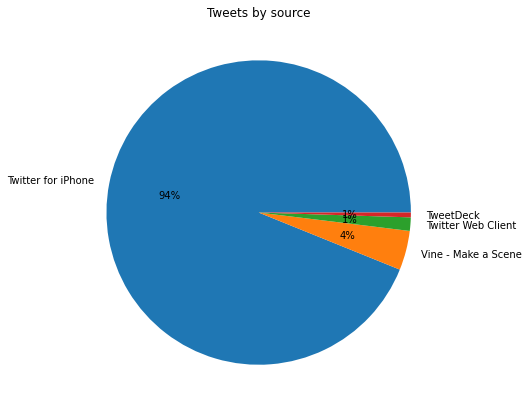

In [83]:
plt.figure(figsize=(12,7))
plt.pie(df.source.value_counts(),autopct='%1.0f%%' , labels = df.source.value_counts().index)
plt.title('Tweets by source')
plt.show()

##### 2-  Most Popular dog race

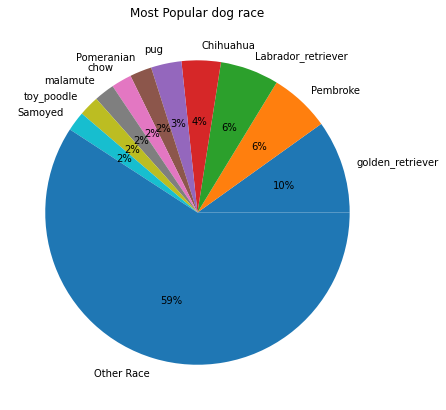

In [84]:
plt.figure(figsize=(12,7))
plt.pie(top_10_race, autopct='%1.0f%%' ,labels = top_10_race.index)
plt.title('Most Popular dog race')
plt.show()

#### 3- Most Rated dog race

In [85]:
top_10_rating = dogs.groupby(['p1']).mean().round(3).rating.nlargest(10)

Text(0, 0.5, 'Mean Rating')

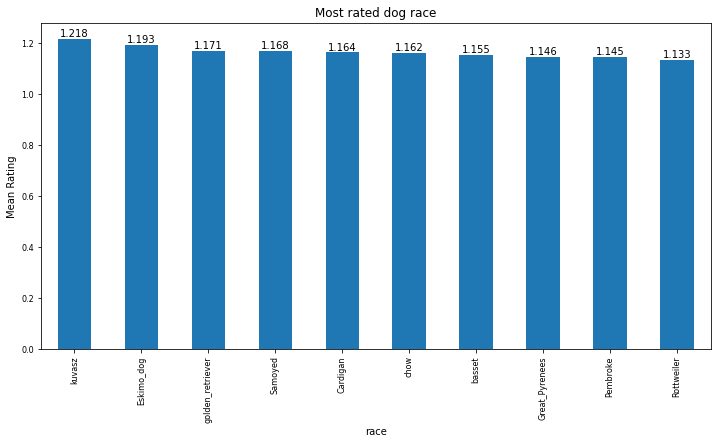

In [86]:
plt.figure(figsize = (12,6))
top_10_rating.plot(kind = "bar", fontsize=8)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title('Most rated dog race')
plt.xlabel('race')
plt.ylabel('Mean Rating')

#### 4- Most retweet count by dog category

Text(0, 0.5, 'Retweet')

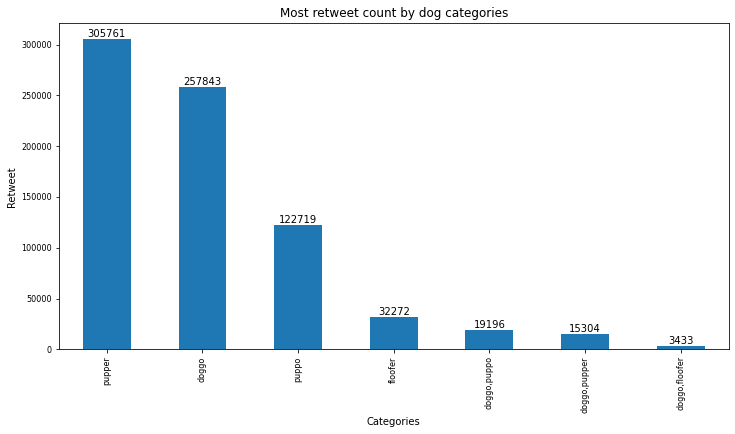

In [87]:
plt.figure(figsize = (12,6))
only_dogs.groupby(['dog_category']).sum().retweet_count.nlargest(10).plot(kind = "bar", fontsize=8)
ax = plt.gca()
plt.bar_label(ax.containers[0])
plt.title('Most retweet count by dog categories')
plt.xlabel('Categories')
plt.ylabel('Retweet')

Pupper and doggo are the most popular dog categories.